In [1]:
from matplotlib import pyplot as plt

In [2]:
import numpy as np

In [3]:
import cv2

# Load an image
`cv2.imread(path[, flag])`
#### The three flags of imread are:
- `cv2.IMREAD_COLOR` : Loads a color image. Any transparency of image will be neglected. It is the default flag.
- `cv2.IMREAD_GRAYSCALE` : Loads image in grayscale mode
- `cv2.IMREAD_UNCHANGED` : Loads image as such including alpha channel

We could also pass the integers __1, 0, -1__ respectively

In [4]:
img = cv2.imread('dataset/show_as_function.jpg')

In [5]:
# let's print out the type of img returned by cv2.imread
print(type(img))
print(img.shape)

<class 'numpy.ndarray'>
(450, 450, 3)


It's shown that loaded by imread, the result itself is a ndarray, which means that we could apply multiple operations on it  using numpy

In [6]:
# Outside of Jupyter environment, we could use the following code to show an image
'''
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''
# However, inside Jupyter, we may use hyperlink or pyplot

"\ncv2.imshow('image',img)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n"

Here we use hyperlink
![For the Horde!!](dataset/show_as_function.jpg "For the Horde")

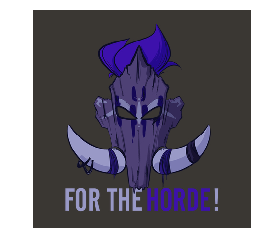

In [7]:
# Here we TRY to render the image via matplotlib
plt.imshow(img)
plt.axis("off") # to hide tick values on X and Y axis
plt.show()

In [8]:
# It's qute interesting that The color is weired in matplotlib. 
# This is because opencv adapt BGR order instead of RGB. So another extra step is required
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

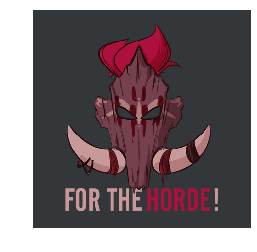

In [9]:
# And finally, we gain the desired one
plt.imshow(img)
plt.axis("off")
plt.show()

We have tons of approaches to represent an image, both datatype and color space varies.
The common data types and the corresponding ranges are:  

data type | range
--- | ---
CV_8U | 0 - 255
CV_16U | 0 - 65535
CV_32F | 0 - 1

The common color spaces are:
RGB, HSV, $YC_rC_b$, CIE L\*a\*b, CIE L\*u\*v. It will be introduced in the appendix chapter

To display the image as a function, let's convert RGB to Gray using the following function:
$$Y \leftarrow 0.299 \cdot R + 0.587 \cdot G + 0.114 \cdot B$$

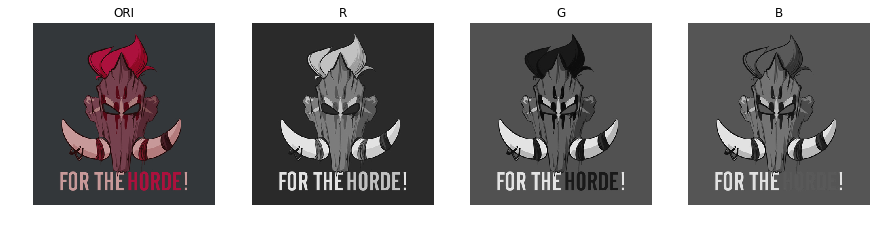

In [10]:
# First, let's split the image per channel
r, g, b = cv2.split(img)
disp = [img, r, g, b]
titles = ['ORI','R','G','B']
cmap = [None] + ['gray'] * 3
f, axarr = plt.subplots(1, 4,figsize=(15,15))
for i in range(len(axarr)):
    axarr[i].imshow(disp[i], cmap = cmap[i])
    axarr[i].axis("off")
    axarr[i].set_title(titles[i])

In [11]:
# Then we get the rgb value in each pixel
gray = ((r * 0.299).astype(np.float32) + (g * 0.587).astype(np.float32) + (b * 0.114).astype(np.float32)).astype(np.uint8)

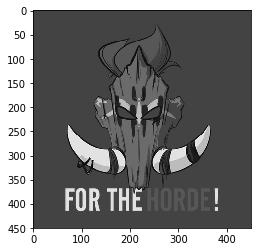

In [12]:
plt.imshow(gray, cmap = 'gray')

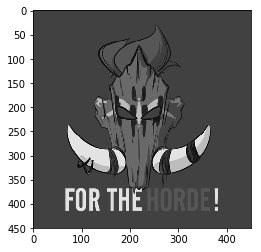

In [13]:
# Which looks similar to our result
imgGray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
# Note that respectively, the inverse function is cv2.merge((b,g,r))
plt.imshow(imgGray, cmap = 'gray')

But are these two metrics __identical__?
Let's calculate the difference

In [14]:
np.mean(np.abs(imgGray - gray))

0.13824197530864196

So the answer is __NO__!
More detailedly, We can find the average error among those not as same as opencv gave us

In [15]:
np.mean(np.abs(imgGray - gray)[np.abs(imgGray - gray) != 0])

1.0

Which is exactly __1__. And I haven't find the reason yet. But anyway, let's move on, to show the image as a function

In [16]:
x = np.linspace(1, gray.shape[0], num = gray.shape[0], dtype = np.uint16)
y = np.linspace(1, gray.shape[1], num = gray.shape[1], dtype = np.uint16)[:,np.newaxis, ]

In [17]:
from mpl_toolkits.mplot3d import Axes3D

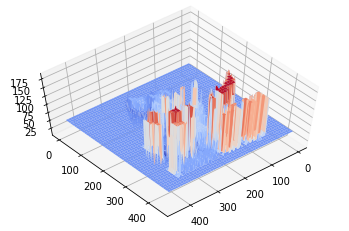

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, gray, cmap = 'coolwarm')
ax.view_init(60, 50)
plt.draw()

The last step is to output our data, 
before merge the three channels, Let's inverse the red channel first, then we can prove that we did something and output the changed one successfully.

In [19]:
r = 255 - r

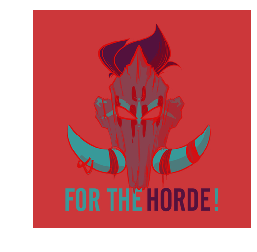

In [20]:
# Here we follow the RGB order temporarily to satisfty plot.imshow()
img_out = cv2.merge((r, g, b))
plt.axis("off")
plt.imshow(img_out)

Now the background turns to be red and the hair be dark, and we could see some cyan on the horns.
Let's write it out to the hard drive.

In [21]:
# Note that by default we still need to follow the BGR order, so let's re-merge it
img_out = cv2.merge((b, g, r))
cv2.imwrite('dataset/img_out.jpg', img_out)

True